In [5]:
!pip install sk-video

  Using cached https://files.pythonhosted.org/packages/dd/3f/ce848b8b2062ad1ccf1449094a740c775f6c761339f411e44f1e090f23a7/sk_video-1.1.10-py2.py3-none-any.whl
distributed 1.21.8 requires msgpack, which is not installed.
tensorboard 1.8.0 has requirement bleach==1.5.0, but you'll have bleach 2.1.3 which is incompatible.
tensorboard 1.8.0 has requirement html5lib==0.9999999, but you'll have html5lib 1.0.1 which is incompatible.


In [6]:
import pandas as pd
import wget
import numpy as np
import os
import skvideo.io
import matplotlib.pyplot as plt
%matplotlib inline
import tqdm

In [7]:
df = pd.read_csv('openbeelden.csv', header=None)

In [ ]:
def loadmovie(file):
    cap = cv2.VideoCapture(file)
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    print(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

    fc = 0
    ret = True

    while (fc < frameCount and ret):
        ret, buf[fc] = cap.read()
        fc += 1

    cap.release()

    return buf

In [8]:
for url in tqdm.tqdm(df[:300][2]):
    file = wget.download(url, out='./downloads/')

  5%|▌         | 16/300 [02:50<1:03:03, 13.32s/it]

KeyboardInterrupt: 

(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 

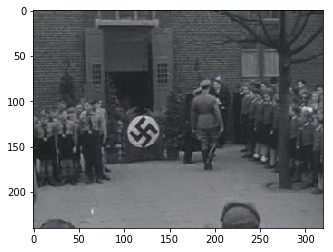

In [12]:
videogen = skvideo.io.vreader('./downloads/10031.10020.WEEKNUMMER411-HRE0000CDBC.mp4')

for i, frame in enumerate(videogen):
    print(frame.shape)

    if i == 210:
        print(frame[:10, :10, :])
        plt.imshow(frame/255)
        break
    

In [17]:
numframes = 0

for file in os.listdir('./downloads/'):
    if file.endswith(".mp4"): 
        cap = cv2.VideoCapture('./downloads/' + file)
        frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        numframes += frameCount
        
#         print(file, frameCount)

#         for f in range(frameCount):
#             ret, frame = cap.read()
                
#             numframes += 1
        cap.release()
        
numframes

252124

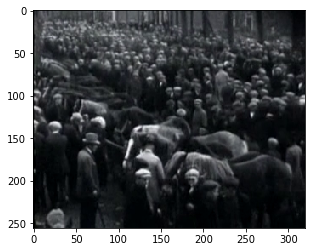

In [27]:
# Test images to plot
images = np.load('./sample.npz')['images']

plt.imshow(images[14])


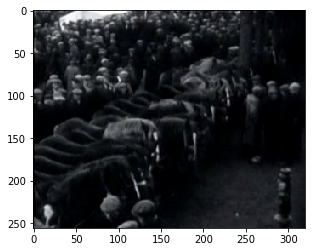

In [29]:
plt.imshow(images[32])


(2000, 256, 320, 3)


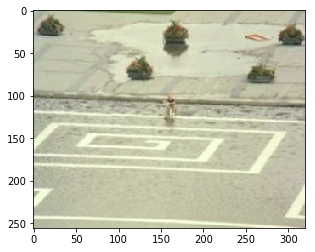

In [59]:
print(images.shape)
plt.imshow(images[1592])